### Importing data from text files

In [1]:
import sys
sys.path.append('python/')

#get the f function from the paper
import dataPython as dp
import numpy as np
import scipy.interpolate as inter

data_bh = dp.getXYdata('data/blackhole.txt')
data_bulge = dp.getXYdata('data/bulge.txt')
data_disc = dp.getXYdata('data/disc.txt')
data_dm = dp.getXYdata('data/darkmatter.txt')
data_bh_nord = dp.getXYdata('data/NGC5533-blackhole_fmt.txt')
data_bulge_nord = dp.getXYdata('data/NGC5533-bulge_fmt.txt')
data_disc_nord = dp.getXYdata('data/NGC5533-disc_fmt.txt')
data_dm_nord = dp.getXYdata('data/NGC5533-dm_fmt.txt')
data_gas_nord = dp.getXYdata('data/NGC5533-gas_red.txt')

#Black hole (ours)
#convert to numpy arrays
r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

#smoothing
r_bh = r_bh[r_bh.argsort()]
v_bh = v_bh[r_bh.argsort()]
idx = np.arange(0,np.shape(r_bh)[0])
f_v_bh = inter.InterpolatedUnivariateSpline(r_bh[idx%1==0], v_bh[idx%1==0], k=3)
f_v_bh_v = np.vectorize(f_v_bh)

#Black hole (Noordermeer's)
#convert to numpy arrays
r_bh_nord = np.asarray(data_bh_nord['xx'])
v_bh_nord = np.asarray(data_bh_nord['yy'])

#smoothing
r_bh_nord = r_bh_nord[r_bh_nord.argsort()]
v_bh_nord = v_bh_nord[r_bh_nord.argsort()]
idx = np.arange(0,np.shape(r_bh_nord)[0])
f_v_bh_nord = inter.InterpolatedUnivariateSpline(r_bh_nord[idx%1==0], v_bh_nord[idx%1==0], k=3)
f_v_bh_v_nord = np.vectorize(f_v_bh_nord)

#Bulge (ours)
#convert to numpy arrays
r_b = np.asarray(data_bulge['xx'])
v_b = np.asarray(data_bulge['yy'])

#smoothing
r_b = r_b[r_b.argsort()]
v_b = v_b[r_b.argsort()]
idx = np.arange(0,np.shape(r_b)[0])
f_v_b = inter.InterpolatedUnivariateSpline(r_b[idx%4==0], v_b[idx%4==0], k=3)
f_v_b_v = np.vectorize(f_v_b)

#Bulge (Noordermeer's)
#convert to numpy arrays
r_b_nord = np.asarray(data_bulge_nord['xx'])
v_b_nord = np.asarray(data_bulge_nord['yy'])

#smoothing
r_b_nord = r_b_nord[r_b_nord.argsort()]
v_b_nord = v_b_nord[r_b_nord.argsort()]
idx = np.arange(0,np.shape(r_b_nord)[0])
f_v_b_nord = inter.InterpolatedUnivariateSpline(r_b_nord[idx%4==0], v_b_nord[idx%4==0], k=3)
f_v_b_v_nord = np.vectorize(f_v_b_nord)

#Disc (ours)
#convert to numpy arrays
r_d = np.asarray(data_disc['xx'])
v_d = np.asarray(data_disc['yy'])

#smoothing
r_d = r_d[r_d.argsort()]
v_d = v_d[r_d.argsort()]
idx = np.arange(0,np.shape(r_d)[0])
f_v_d = inter.InterpolatedUnivariateSpline(r_d[idx%4==0], v_d[idx%4==0], k=3)
f_v_d_v = np.vectorize(f_v_d)

#Disc (Noordermeer's)
#convert to numpy arrays
r_d_nord = np.asarray(data_disc_nord['xx'])
v_d_nord = np.asarray(data_disc_nord['yy'])

#smoothing
r_d_nord = r_d_nord[r_d_nord.argsort()]
v_d_nord = v_d_nord[r_d_nord.argsort()]
idx = np.arange(0,np.shape(r_d_nord)[0])
f_v_d_nord = inter.InterpolatedUnivariateSpline(r_d_nord[idx%4==0], v_d_nord[idx%4==0], k=3)
f_v_d_v_nord = np.vectorize(f_v_d_nord)

#Dark Matter (ours)
#convert to numpy arrays
r_dm = np.asarray(data_dm['xx'])
v_dm = np.asarray(data_dm['yy'])

#smoothing
r_dm = r_dm[r_dm.argsort()]
v_dm = v_dm[r_dm.argsort()]
idx = np.arange(0,np.shape(r_dm)[0])
f_v_dm = inter.InterpolatedUnivariateSpline(r_dm[idx%4==0], v_dm[idx%4==0], k=3)
f_v_dm_v = np.vectorize(f_v_dm)

#Dark Matter (Noordermeer's)
#convert to numpy arrays
r_dm_nord = np.asarray(data_dm_nord['xx'])
v_dm_nord = np.asarray(data_dm_nord['yy'])

#smoothing
r_dm_nord = r_dm_nord[r_dm_nord.argsort()]
v_dm_nord = v_dm_nord[r_dm_nord.argsort()]
idx = np.arange(0,np.shape(r_dm_nord)[0])
f_v_dm_nord = inter.InterpolatedUnivariateSpline(r_dm_nord[idx%4==0], v_dm_nord[idx%4==0], k=3)
f_v_dm_v_nord = np.vectorize(f_v_dm_nord)

#Gas (Noordermeer's)
#convert to numpy arrays
r_gas_nord = np.asarray(data_gas_nord['xx'])
v_gas_nord = np.asarray(data_gas_nord['yy'])

#smoothing
r_gas_nord = r_gas_nord[r_gas_nord.argsort()]
v_gas_nord = v_gas_nord[r_gas_nord.argsort()]
idx = np.arange(0,np.shape(r_gas_nord)[0])
f_v_gas_nord = inter.InterpolatedUnivariateSpline(r_gas_nord[idx%4==0], v_gas_nord[idx%4==0], k=3)
f_v_gas_v_nord = np.vectorize(f_v_gas_nord)

### Original velocity curves from our calculations

In [2]:
#total velocity
#ours (+Noordermeer's gas curve)
f_tot = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b(x)**2 + f_v_bh(x)**2 + f_v_gas_nord(x)**2)
f_tot_v = np.vectorize(f_tot)

#Noordermeer's
f_tot_nord = lambda x: np.sqrt(f_v_dm_nord(x)**2 + f_v_d_nord(x)**2 + f_v_b_nord(x)**2 + f_v_bh_nord(x)**2 + f_v_gas_nord(x)**2)
f_tot_v_nord = np.vectorize(f_tot_nord)

data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import pylab

fig = plt.figure(figsize=(9.0,12.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

xmax = 19
x = np.arange(0,xmax,0.1)
xb = np.arange(0.5,xmax,0.1)

plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)

#our calculated values    
plt.plot(xb, f_v_b_v(xb), color='r', linestyle='solid', label='bulge') 
plt.plot(x, f_v_bh_v(x), color='darkviolet', linewidth=2, linestyle=':', label='central black hole')
plt.plot(xb, f_v_d_v(xb), color='gold', linewidth=2, linestyle='dashdot', label='disc')
plt.plot(xb, f_v_dm_v(xb), color='c', linewidth=2, linestyle='--', label='dark matter')
plt.plot(xb, f_tot_v(xb), color='k', linewidth=3, linestyle='solid', label='total velocity')

#comparing to Noordermeer's plot
plt.plot(xb, f_v_b_v_nord(xb), color='silver', linestyle='solid', label='bulge (Noordermeer)') 
plt.plot(x, f_v_bh_v_nord(x), color='silver', linewidth=2, linestyle=':', label='central black hole (Noordermeer)')
plt.plot(xb, f_v_d_v_nord(xb), color='silver', linewidth=2, linestyle='dashdot', label='stellar disc (Noordermeer)')
plt.plot(xb, f_v_dm_v_nord(xb), color='silver', linewidth=2, linestyle='--', label='dark matter (Noordermeer)')
plt.plot(xb, f_v_gas_v_nord(xb), color='silver', linewidth=2, linestyle=(0, (1, 10)), label='gaseous disc (Noordermeer)')
plt.plot(xb, f_tot_v_nord(xb), color='silver', linewidth=3, linestyle='solid', label='total velocity (Noordermeer)')

plt.axis('tight');                                

ax3.set_ylim(-10,350)
ax3.set_xlim(0,xmax)
ax3.set_title('NGC 5533 Galaxy', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Rotation Curve (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(loc=0,fontsize=14, bbox_to_anchor=(0.5, -0.1));                                   #adding legend
plt.tight_layout()
plt.savefig('NGC5533total1.eps')
plt.show()

<Figure size 900x1200 with 1 Axes>

### Disc velocity multiplied by 110/700 to get a closer fit

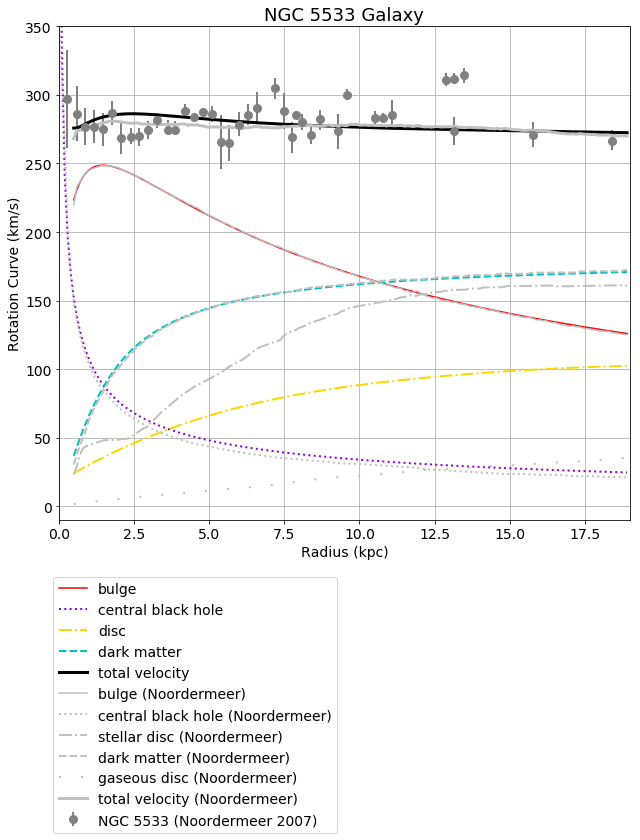

In [3]:
#total velocity
#ours (+Noordermeer's gas curve)
f_tot = lambda x: np.sqrt(f_v_dm(x)**2 + (110/700)*f_v_d(x)**2 + f_v_b(x)**2 + f_v_bh(x)**2 + f_v_gas_nord(x)**2)
f_tot_v = np.vectorize(f_tot)

#Noordermeer's
f_tot_nord = lambda x: np.sqrt(f_v_dm_nord(x)**2 + f_v_d_nord(x)**2 + f_v_b_nord(x)**2 + f_v_bh_nord(x)**2 + f_v_gas_nord(x)**2)
f_tot_v_nord = np.vectorize(f_tot_nord)

data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])


#plotting
fig = plt.figure(figsize=(9.0,12.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

xmax = 19
x = np.arange(0,xmax,0.1)
xb = np.arange(0.5,xmax,0.1)

plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)
    
plt.plot(xb, f_v_b_v(xb), color='r', linestyle='solid', label='bulge') 
plt.plot(x, f_v_bh_v(x), color='darkviolet', linewidth=2, linestyle=':', label='central black hole')
plt.plot(xb, (160/650)*f_v_d_v(xb), color='gold', linewidth=2, linestyle='dashdot', label='disc')
plt.plot(xb, f_v_dm_v(xb), color='c', linewidth=2, linestyle='--', label='dark matter')
plt.plot(xb, f_tot_v(xb), color='k', linewidth=3, linestyle='solid', label='total velocity')

#comparing to Noordermeer's plot
plt.plot(xb, f_v_b_v_nord(xb), color='silver', linestyle='solid', label='bulge (Noordermeer)') 
plt.plot(x, f_v_bh_v_nord(x), color='silver', linewidth=2, linestyle=':', label='central black hole (Noordermeer)')
plt.plot(xb, f_v_d_v_nord(xb), color='silver', linewidth=2, linestyle='dashdot', label='stellar disc (Noordermeer)')
plt.plot(xb, f_v_dm_v_nord(xb), color='silver', linewidth=2, linestyle='--', label='dark matter (Noordermeer)')
plt.plot(xb, f_v_gas_v_nord(xb), color='silver', linewidth=2, linestyle=(0, (1, 10)), label='gaseous disc (Noordermeer)')
plt.plot(xb, f_tot_v_nord(xb), color='silver', linewidth=3, linestyle='solid', label='total velocity (Noordermeer)')


plt.axis('tight'); 

ax3.set_ylim(-10,350)
ax3.set_xlim(0,xmax)
ax3.set_title('NGC 5533 Galaxy', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Rotation Curve (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(loc=0,fontsize=14, bbox_to_anchor=(0.5, -0.1));                                   #adding legend
plt.tight_layout()
plt.savefig('NGC5533total2.eps')
plt.show()

### Testing the two-component model (disc+halo)

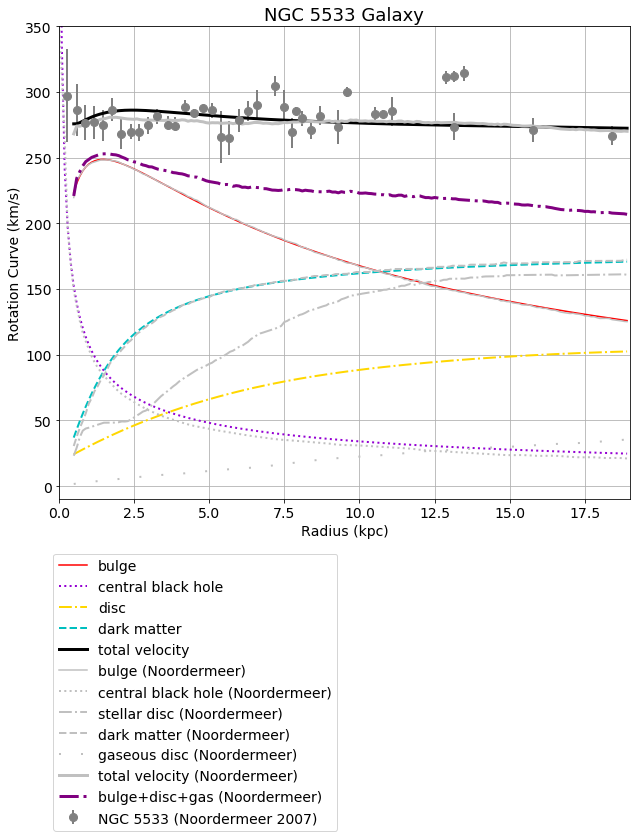

In [4]:
#adding Noordermeer's disc+bulge+gas for the two-component model
f_disc_comp_nord = lambda x: np.sqrt(f_v_d_nord(x)**2 + f_v_b_nord(x)**2 + f_v_gas_nord(x)**2)
f_disc_comp_v_nord = np.vectorize(f_disc_comp_nord)

#total velocity
#ours (+Noordermeer's gas curve)
f_tot = lambda x: np.sqrt(f_v_dm(x)**2 + (110/700)*f_v_d(x)**2 + f_v_b(x)**2 + f_v_bh(x)**2 + f_v_gas_nord(x)**2)
f_tot_v = np.vectorize(f_tot)

#Noordermeer's
f_tot_nord = lambda x: np.sqrt(f_v_dm_nord(x)**2 + f_v_d_nord(x)**2 + f_v_b_nord(x)**2 + f_v_bh_nord(x)**2 + f_v_gas_nord(x)**2)
f_tot_v_nord = np.vectorize(f_tot_nord)

data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])


#plotting
fig = plt.figure(figsize=(9.0,12.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

xmax = 19
x = np.arange(0,xmax,0.1)
xb = np.arange(0.5,xmax,0.1)

plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)
    
plt.plot(xb, f_v_b_v(xb), color='r', linestyle='solid', label='bulge') 
plt.plot(x, f_v_bh_v(x), color='darkviolet', linewidth=2, linestyle=':', label='central black hole')
plt.plot(xb, (160/650)*f_v_d_v(xb), color='gold', linewidth=2, linestyle='dashdot', label='disc')
plt.plot(xb, f_v_dm_v(xb), color='c', linewidth=2, linestyle='--', label='dark matter')
plt.plot(xb, f_tot_v(xb), color='k', linewidth=3, linestyle='solid', label='total velocity')

#comparing to Noordermeer's plot
plt.plot(xb, f_v_b_v_nord(xb), color='silver', linestyle='solid', label='bulge (Noordermeer)') 
plt.plot(x, f_v_bh_v_nord(x), color='silver', linewidth=2, linestyle=':', label='central black hole (Noordermeer)')
plt.plot(xb, f_v_d_v_nord(xb), color='silver', linewidth=2, linestyle='dashdot', label='stellar disc (Noordermeer)')
plt.plot(xb, f_v_dm_v_nord(xb), color='silver', linewidth=2, linestyle='--', label='dark matter (Noordermeer)')
plt.plot(xb, f_v_gas_v_nord(xb), color='silver', linewidth=2, linestyle=(0, (1, 10)), label='gaseous disc (Noordermeer)')
plt.plot(xb, f_tot_v_nord(xb), color='silver', linewidth=3, linestyle='solid', label='total velocity (Noordermeer)')
plt.plot(xb, f_disc_comp_v_nord(xb), color='purple', linewidth=3, linestyle='dashdot', label='bulge+disc+gas (Noordermeer)')

plt.axis('tight'); 

ax3.set_ylim(-10,350)
ax3.set_xlim(0,xmax)
ax3.set_title('NGC 5533 Galaxy', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Rotation Curve (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(loc=0,fontsize=14, bbox_to_anchor=(0.5, -0.1));                                   #adding legend
plt.tight_layout()
plt.savefig('NGC5533total3.eps')
plt.show()